# scikit-learn-svm

Credits: Forked from [PyCon 2015 Scikit-learn Tutorial](https://github.com/jakevdp/sklearn_pycon2015) by Jake VanderPlas

* Support Vector Machine Classifier
* Support Vector Machine with Kernels Classifier

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn
from sklearn.datasets.samples_generator import make_blobs, make_circles
from sklearn.svm import SVC

seaborn.set()

## Support Vector Machine Classifier

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification** or for **regression**. SVMs draw a boundary between clusters of data.  SVMs attempt to maximize the margin between sets of points.  Many lines can be drawn to separate the points above:

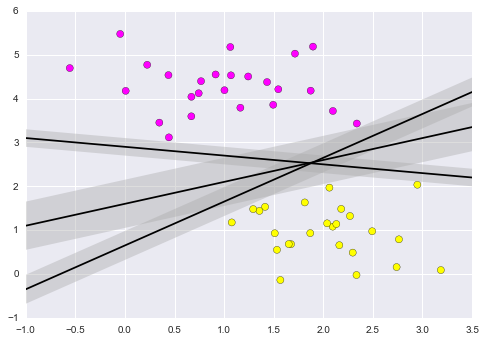

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Fit the model:

In [3]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Plot the boundary:

In [4]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # Plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In the following plot the dashed lines touch a couple of the points known as *support vectors*, which are stored in the ``support_vectors_`` attribute of the classifier:

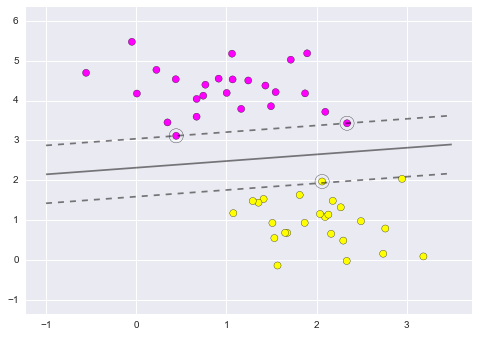

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

## Support Vector Machine with Kernels Classifier

Kernels are useful when the decision boundary is not linear.  A Kernel is some functional transformation of the input data.  SVMs have clever tricks to ensure kernel calculations are efficient.  In the example below, a linear boundary is not useful in separating the groups of points:

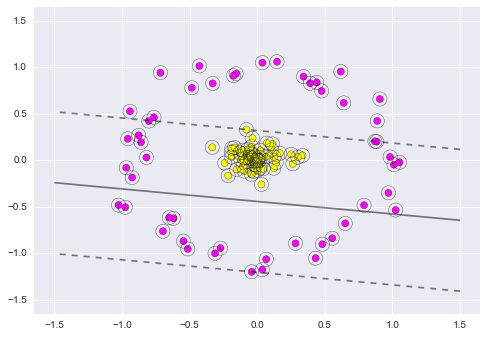

In [6]:
X, y = make_circles(100, factor=.1, noise=.1)

# Case 1: A radial base kernel
clf = SVC(kernel='linear').fit(X, y)

# Case 2: A polynomial kernel with attributes
# clf = SVC(kernel='poly', degree=6, coef0=1.6).fit(X, y)

# Case 3: Our own kernel
# def my_kernel(x, y):
#     return np.dot(np.square(x), np.square(y).T)
# clf = SVC(kernel=my_kernel).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

A simple model that could be useful is a **radial basis function**:

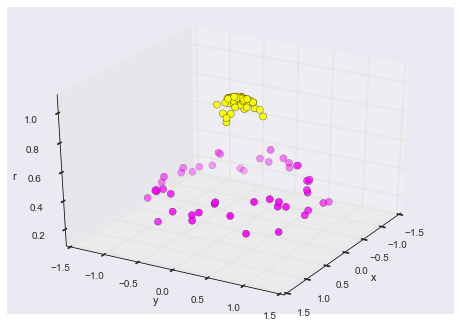

In [7]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D()

In three dimensions, there is a clear separation between the data.  Run the SVM with the rbf kernel:

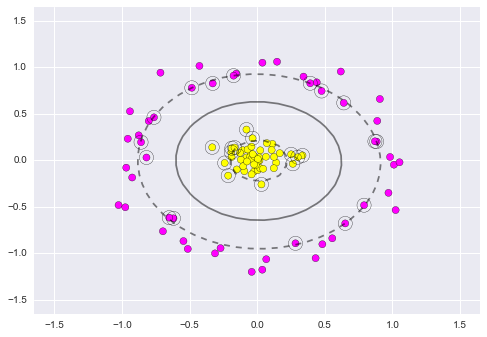

In [8]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

SVM additional notes:
* When using an SVM you need to choose the right values for parameters such as c and gamma.  Model validation can help to determine these optimal values by trial and error.
* SVMs run in O(n^3) performance.  LinearSVC is scalable, SVC does not seem to be scalable.  For large data sets try transforming the data to a smaller space and use LinearSVC with rbf.